In [89]:
import pandas as pd
import datetime
from ast import literal_eval
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# merge dataframes from all years
df = pd.DataFrame({})
for i in range(1,13):
    if i < 10:
        df = df.append(pd.read_csv('datasets/20160{0}-hubway-tripdata.csv'.format(i)))
    else:
        df = df.append(pd.read_csv('datasets/2016{0}-hubway-tripdata.csv'.format(i)))
print(df.shape)
print(df.columns)

(1236199, 15)
Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [52]:
# filter out records where lat/lngs are 0
df = df[df['start station latitude'] > 0]
df = df[df['end station latitude'] > 0]
df = df[df['start station longitude'] < 0]
df = df[df['end station longitude'] < 0]
df.shape

(1236197, 15)

In [53]:
# filter out records where start and end stations are the same
df = df[df['start station name'] != df['end station name']]
df.shape

(1197559, 15)

In [54]:
# create day of year and day of week marker marker
df['starttime'] = pd.to_datetime(df['starttime'])
df['dayofyear'] = df['starttime'].dt.date
df['time'] = df['starttime'].dt.time
df['dayofweek'] = df['starttime'].apply(lambda date: date.dayofweek)

In [55]:
# find busiest day of year
df['dayofyear'].value_counts()

2016-08-09    6751
2016-09-13    6694
2016-07-19    6658
2016-09-15    6644
2016-07-20    6634
2016-09-21    6541
2016-06-23    6524
2016-09-22    6524
2016-08-03    6513
2016-07-12    6426
2016-09-16    6402
2016-08-30    6398
2016-06-22    6332
2016-08-04    6329
2016-07-21    6295
2016-09-14    6275
2016-09-12    6274
2016-08-08    6253
2016-07-28    6242
2016-07-27    6239
2016-06-16    6213
2016-06-21    6206
2016-06-24    6185
2016-09-20    6161
2016-08-05    6156
2016-10-19    6140
2016-09-08    6116
2016-07-11    6116
2016-07-07    6096
2016-08-31    6094
              ... 
2016-02-12     414
2016-01-20     413
2016-01-21     403
2016-01-31     400
2016-02-16     377
2016-02-24     376
2016-02-09     371
2016-12-25     341
2016-01-09     315
2016-01-05     314
2016-02-07     303
2016-01-19     290
2016-01-04     274
2016-01-17     261
2016-12-24     258
2016-02-06     254
2016-01-16     246
2016-01-01     232
2016-01-03     230
2016-12-17     229
2016-01-02     213
2016-01-18  

In [56]:
# filter data frame for busiest day of year
busiest_day = df[df['dayofyear'] == datetime.date(2016,8,9)]
busiest_day.shape

(6751, 18)

In [57]:
# load uber data
df_uber = pd.read_csv('datasets/uber_cost_distance.csv')
df_uber = df_uber.drop_duplicates(subset = ['start station id', 'end station id'])

In [58]:
# print uber data summary
print(df_uber.shape)
print(df_uber.columns)

(22377, 16)
Index([u'routes_id', u'start station latitude', u'start station longitude',
       u'end station latitude', u'end station longitude',
       u'routes_status_code', u'uber_pool_distance', u'uber_pool_duration',
       u'uber_pool_high_estimate', u'uber_pool_low_estimate',
       u'uber_x_distance', u'uber_x_duration', u'uber_x_high_estimate',
       u'uber_x_low_estimate', u'start station id', u'end station id'],
      dtype='object')


In [59]:
# load google bicycle data
df_google_bicycle = pd.read_csv('datasets/google_route_bicycle.csv')
df_google_bicycle = df_google_bicycle.drop_duplicates(subset = ['start station id', 'end station id'])

In [60]:
# print google bicycle data summary
print(df_google_bicycle.shape)
print(df_google_bicycle.columns)

(22375, 11)
Index([u'routes_id', u'start station latitude_x', u'start station longitude_x',
       u'end station latitude_x', u'end station longitude_x',
       u'routes_status_code', u'bicycling_polylines', u'bicycling_duration',
       u'route', u'start station id', u'end station id'],
      dtype='object')


In [61]:
# merge busiest day dataframe with google and uber data
busiest_day_merged = busiest_day.merge(df_uber, how = 'left', on = ['start station id', 'end station id'])
busiest_day_merged = busiest_day_merged.merge(df_google_bicycle, how = 'left', on = ['end station id', 'start station id'])

In [62]:
# print summary of busiest day merged dataframe
print(busiest_day_merged.shape)
print(busiest_day_merged.columns)

(6751, 41)
Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude_x_x',
       u'start station longitude_x_x', u'end station id', u'end station name',
       u'end station latitude_x_x', u'end station longitude_x_x', u'bikeid',
       u'usertype', u'birth year', u'gender', u'dayofyear', u'time',
       u'dayofweek', u'routes_id_x', u'start station latitude_y',
       u'start station longitude_y', u'end station latitude_y',
       u'end station longitude_y', u'routes_status_code_x',
       u'uber_pool_distance', u'uber_pool_duration',
       u'uber_pool_high_estimate', u'uber_pool_low_estimate',
       u'uber_x_distance', u'uber_x_duration', u'uber_x_high_estimate',
       u'uber_x_low_estimate', u'routes_id_y', u'start station latitude_x_y',
       u'start station longitude_x_y', u'end station latitude_x_y',
       u'end station longitude_x_y', u'routes_status_code_y',
       u'bicycling_polylines', u'bicycling_dur

In [63]:
busiest_day_merged['bicycling_duration_total'] = busiest_day_merged['bicycling_duration'].apply(lambda x: sum(literal_eval(x)))
busiest_day_merged['duration_delta'] = busiest_day_merged['bicycling_duration_total'] - busiest_day_merged['uber_x_duration']

In [64]:
# keep only relevant columns
busiest_day_merged['trip_id'] = busiest_day_merged.index 
columns_to_keep = ['trip_id', 'bicycling_duration', 'starttime', 'route', 'uber_x_high_estimate', 'duration_delta']
df_busiest_day = busiest_day_merged[columns_to_keep]

In [65]:
# check nulls
df_busiest_day.isnull().sum()

trip_id                 0
bicycling_duration      0
starttime               0
route                   0
uber_x_high_estimate    0
duration_delta          0
dtype: int64

In [66]:
def get_data(row):
    mini_df = []
    trip_id = row['trip_id']
    time = row['starttime']
    uber_cost = row['uber_x_high_estimate']
    uber_duration_delta = row['duration_delta']
    route = literal_eval(row['route'])
    duration = literal_eval(row['bicycling_duration'])
    for i, segment in enumerate(route):
        time_increment = duration[i] * 1.0 / len(segment)
        for coordinate in segment:
            mini_df.append({'trip': trip_id, 'timestamp' : time, 'uber duration delta' : uber_duration_delta, 
                            'uber cost' : uber_cost, 'lat' : coordinate[0], 'lng' : coordinate[1]})
            time = time + pd.Timedelta(seconds=time_increment)
    return pd.DataFrame(mini_df)

In [67]:
df_busiest_day_all = pd.DataFrame({})
for index, row in df_busiest_day.iterrows():
    df_busiest_day_all = df_busiest_day_all.append(get_data(row))

In [68]:
print(df_busiest_day_all.shape)
print(df_busiest_day_all.columns)

(1104883, 6)
Index([u'lat', u'lng', u'timestamp', u'trip', u'uber cost',
       u'uber duration delta'],
      dtype='object')


In [85]:
df_busiest_day_all['timestamp_alt'] = df_busiest_day_all['timestamp'] + pd.Timedelta(hours=4)
df_busiest_day_all['uber cost std'] = df_busiest_day_all['uber cost'] / df_busiest_day_all['uber cost'].max()

In [86]:
df_busiest_day_all.head()

,lat,lng,timestamp,trip,uber cost,uber duration delta,timestamp_alt,uber cost std
0,42.39703,-71.12295,2016-08-09 00:00:22.000000,0,11.0,169.0,2016-08-09 04:00:22.000000,0.305556
1,42.39685,-71.12232,2016-08-09 00:00:26.333333,0,11.0,169.0,2016-08-09 04:00:26.333333,0.305556
2,42.39677,-71.12211,2016-08-09 00:00:30.666666,0,11.0,169.0,2016-08-09 04:00:30.666666,0.305556
3,42.39677,-71.12211,2016-08-09 00:00:34.999999,0,11.0,169.0,2016-08-09 04:00:34.999999,0.305556
4,42.39669,-71.12216,2016-08-09 00:00:48.999999,0,11.0,169.0,2016-08-09 04:00:48.999999,0.305556


(array([ 288420.,  362079.,  224778.,  119521.,   54393.,   28855.,
          11753.,    8413.,    3127.,    3544.]),
 array([  7. ,   9.9,  12.8,  15.7,  18.6,  21.5,  24.4,  27.3,  30.2,
         33.1,  36. ]),
 <a list of 10 Patch objects>)

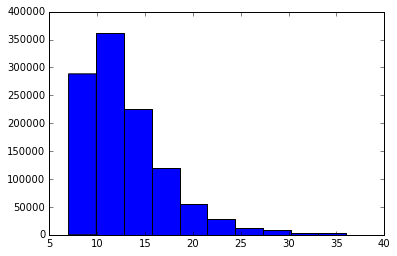

In [93]:
plt.hist(df_busiest_day_all['uber cost'], bins = 10)

In [87]:
# write to csv
df_busiest_day_all.to_csv('datasets/hubway-trips-20160809.csv', index = False)